In [20]:
from lyricsgenius import Genius
import re
import pandas as pd
import matplotlib.pyplot as plt
from pymystem3 import Mystem
from wordcloud import WordCloud
from nltk.corpus import stopwords
from string import punctuation

# Set up Genius API key and artist name
token = "UE498H-PVYkklJl02EC9NsocJuCiHZ32nrNhdXHlVb_BTVwtags81V7Y8OKCgX9P"
genius = Genius(token)
genius.remove_section_headers = True
genius.verbose = False
genius.skip_non_songs = True
genius.excluded_terms = ["(Remix)", "(Live)"]

# Fetch artist's songs from Genius
def fetch_artist_songs(artist_name):
    artist = genius.search_artist(artist_name, max_songs = 2)
    lyrics = artist.save_lyrics(filename='artist.txt', extension='txt')
    return lyrics
   


In [21]:

# Preprocess lyrics:
def preprocess_lyrics(lyrwords):
  
    lyrwords = tokenize()
    filtered = filter_non_eng(lyrwords)
    without_sw = filter_stopwords(filtered)
    lemmas = lemmatizing(without_sw)
    result = remove_final_noise(lemmas)
   
    return result


# Tokenize,
#making a list of all words from lyrics
def tokenize():
    lyrwords = []
    with open('artist.txt', 'r') as inputfile:
        for line in inputfile:
            line = line.split()
            lyrwords.extend(line)
    return lyrwords

#filtering non-Russian words:
def filter_non_eng(words):
    eng_noise = "[A-Za-z0-9]+|[\(.* \)(E|e)mbed]"
    fin_noise = []

    for word in words:
        if (re.match(eng_noise, word)):
            fin_noise.append(word)

    filtered = []
    for w in words:
        if w not in fin_noise:
            filtered.append(w)
    return filtered

#pre-processing
#filtering the lyrics from stopwords
def filter_stopwords(words):
    rus_stop = stopwords.words("russian")
    #lowen all the words to gain clearer visibility
    words_low = [word for word in words if word not in rus_stop]

    for w in words:
        words_low.append(w.lower())

    return words_low

#pre-processing:
#FILTER STOP WORDS AND LEMMATIZATION:
def lemmatizing(words):
    rus_stopwords = stopwords.words("russian")
    
    #lemmatizing the words via pymystem
    ms = Mystem()
    lemmas = ms.lemmatize(' '.join(words))
    tok = []

    for w in words:
        tokens = [word for word in words if words not in rus_stopwords\
            and word.strip() not in punctuation]
    
        tok.extend(tokens)
    return tok

#pre-processing:
#delete other noise which can occur in lyrics:
def remove_final_noise(words):  
    noise = ["весь", "э", "хэй", "x", "...", "у", "ж", "лай", "е", "ла", "й", "с", "c", "…", "..", "б", "xx", "?!", "чами", "твой", "это", "«", "свой", "наш","нету", "м", "лу", "хой", "па", "коль", "ля" "эй"]
    slova = []

    for w in words:
        if w not in noise:
            slova.append(w)
   
    fin_slova =[] 
    noise2 = ".*\n"
    
    for word in slova:
        if (re.match(noise2, word)):
            fin_slova.append(word)
        
    fin_result = []
    for w in slova:
        if w not in fin_slova:
            fin_result.append(w)

    return fin_result
        



In [22]:
# Count word frequencies
def count_word_frequencies(lyrics):
    
    word_freq = pd.Series(lyrics).value_counts()
    word_freq[:100]
    
    return word_freq



In [23]:
# word cloud
def create_word_cloud(word_frequencies):
    #Generate word cloud
    wc = WordCloud(width=800, height=600, max_words=2000, background_color='white').generate_from_frequencies(word_frequencies)

    plt.figure(figsize=(12, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()



Please enter the artist's name in Cyrillic!Земфира
artist.txt already exists. Overwrite?
(y/n): y
Wrote artist.txt.


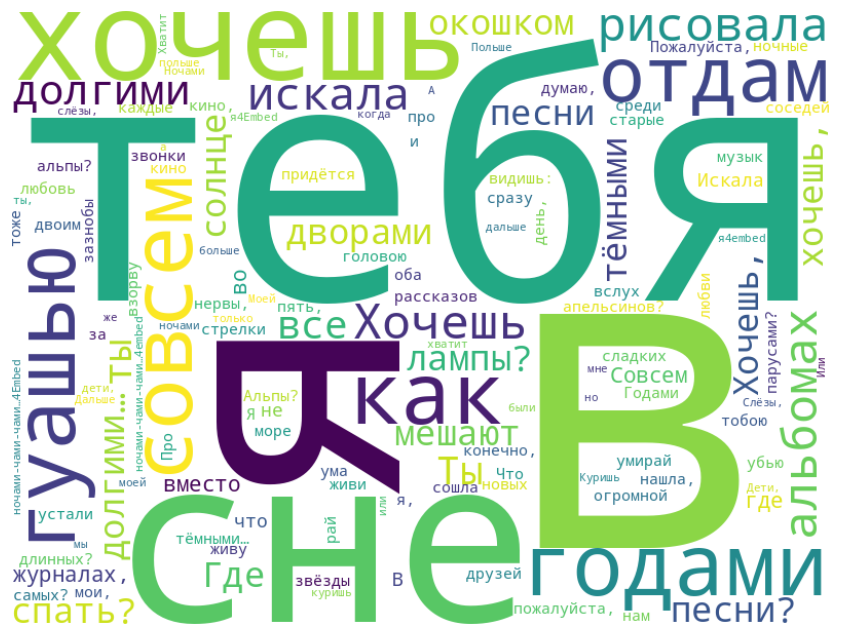

In [24]:
# Main function
if __name__ == '__main__':
    # Fetch artist's songs
    userinput = input("Please enter the artist's name in Cyrillic!")
    songs = fetch_artist_songs(userinput)

    #tokenization, filtering, stop-words, lemmatization
    preprocessed_lyrics = preprocess_lyrics(songs)

    #counting word_frequences
    word_frequencies = count_word_frequencies(preprocessed_lyrics)

    # Create and display the word cloud
    create_word_cloud(word_frequencies)
